Optimization restart 1/5, f = -2.186275718910554
Optimization restart 2/5, f = -2.1862755788962884
Optimization restart 3/5, f = -1.8418301029583768
Optimization restart 4/5, f = -2.186272275201878
Optimization restart 5/5, f = -2.1862757216137014

Name : GP regression
Objective : -2.1862757216137014
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |              value  |  constraints  |  priors
  rbf.variance             |    0.0304210301759  |      +ve      |        
  rbf.lengthscale          |      1.44231134242  |      +ve      |        
  Gaussian_noise.variance  |  1.94937232538e-10  |      +ve      |        


 //anaconda/lib/python3.4/site-packages/matplotlib/figure.py:1744: UserWarning:This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.


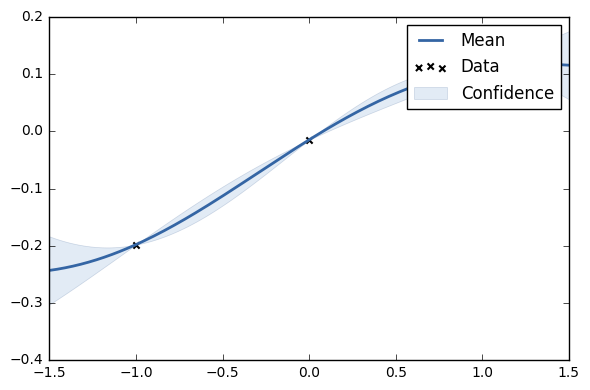

In [536]:
import numpy as np
import matplotlib.pyplot as mp
import GPy
from scipy.stats import norm
from scipy.optimize import minimize

%matplotlib inline
GPy.plotting.change_plotting_library('matplotlib')


def f(x):
	return np.sin( 2*np.pi*x ) + .1 * x + .1*np.random.randn(len(x),1) 
#+ 
num_x = 3
a,b = -1, 1
x = np.linspace(a,b,num_x)
x = np.reshape(x,(num_x,1))
y = f(x)

kernel = GPy.kern.RBF(input_dim=1, variance=.01, lengthscale=1.)

m = GPy.models.GPRegression(x,y,kernel)

m.optimize_restarts(5)

print(m)
fig = m.plot()


In [406]:
num_samples = 101
thres = 1e-3
kappa = 5

max_iter = 32
min_t = np.zeros(max_iter)
iter = 0
min_t[iter] = np.min(y)

while( min(y) > -1.08 ):
    aqfun = lambda x: aLCB( m.predict( np.reshape(x,(len(x),1)))[0], np.sqrt(m.predict(np.reshape(x,(len(x),1)))[1]), kappa)

    samples = np.reshape(np.linspace(a,b,num_samples), (num_samples,1))

    aq = aqfun(samples)
    next_sample = samples[np.argmin(aq)]
    res = minimize( aqfun, next_sample, bounds = [(a,b)])
    next_sample = res.x

    fx = f(next_sample)

    x = np.append(x,next_sample)
    y = np.append(y,fx)

    x = np.reshape(x, (len(x),1))
    y = np.reshape(y, (len(y),1))

    m = GPy.models.GPRegression(x,y,kernel)
    m.optimize_restarts(3)
    min_t[iter] = np.min(y)
    iter += 1
    


In [537]:
y.shape

(3, 1)

Optimization restart 1/10, f = 33.7579855176032
Optimization restart 2/10, f = 33.75798458268821
Optimization restart 3/10, f = 33.75799072105404
Optimization restart 4/10, f = 33.7579927296384
Optimization restart 5/10, f = 33.757984490538014
Optimization restart 6/10, f = 33.757984267850915
Optimization restart 7/10, f = 33.75798429233802
Optimization restart 8/10, f = 33.757988367113185
Optimization restart 9/10, f = 33.757990637919185
Optimization restart 10/10, f = 33.75799153956649


 //anaconda/lib/python3.4/site-packages/matplotlib/figure.py:1744: UserWarning:This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.


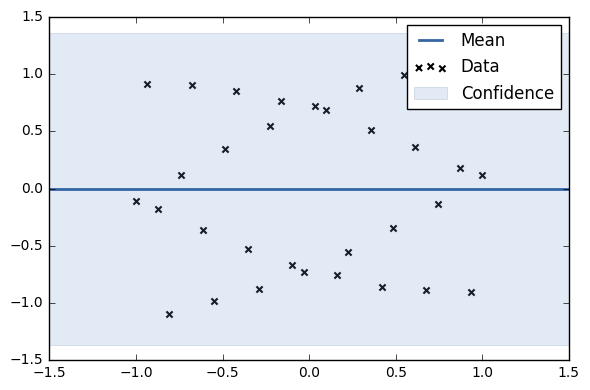

In [407]:
m.optimize_restarts(10)
m.plot()

In [408]:
iter

0

In [482]:
num_runs = 22
num_iter_per_run = np.zeros(num_runs)
for i in range(num_runs):
    
    num_x = 32
    a,b = -1, 1
    x = np.linspace(a,b,num_x) / .95 + .05 * np.random.randn(num_x)
    x = np.reshape(x,(num_x,1))
    y = f(x)

    kernel = GPy.kern.RBF(input_dim=1, variance=.01, lengthscale=1.)

    m = GPy.models.GPRegression(x,y,kernel)

    m.optimize_restarts(5)

    num_samples = 101
    thres = 1e-3
    kappa = 5

    iter = 0
    print(min(y))
    while( min(y) > -1.09 ):
        aqfun = lambda x: aLCB( m.predict( np.reshape(x,(len(x),1)))[0], np.sqrt(m.predict(np.reshape(x,(len(x),1)))[1]), kappa)

        samples = np.reshape(np.linspace(a,b,num_samples), (num_samples,1))

        aq = aqfun(samples)
        next_sample = samples[np.argmin(aq)]
        res = minimize( aqfun, next_sample, bounds = [(a,b)])
        next_sample = res.x

        fx = f(next_sample)

        x = np.append(x,next_sample)
        y = np.append(y,fx)

        x = np.reshape(x, (len(x),1))
        y = np.reshape(y, (len(y),1))

        m = GPy.models.GPRegression(x,y,kernel)
        m.optimize_restarts(3)
        iter += 1
        
    num_iter_per_run[i] = iter


Optimization restart 1/5, f = 37.62549543341409
Optimization restart 2/5, f = 37.625490404432696
Optimization restart 3/5, f = 37.62549568832597
Optimization restart 4/5, f = 37.62548961123659
Optimization restart 5/5, f = 37.62549896474668
[-1.04831298116862]
Optimization restart 1/3, f = 38.30151747787088
Optimization restart 2/3, f = 38.30152415477859
Optimization restart 3/3, f = 38.30151817108077
Optimization restart 1/3, f = 38.96480101000786
Optimization restart 2/3, f = 38.96480620264583
Optimization restart 3/3, f = 38.96481025474059
Optimization restart 1/3, f = 39.61245562049966
Optimization restart 2/3, f = 39.612465359543776
Optimization restart 3/3, f = 39.61246313222834
Optimization restart 1/3, f = 40.2432871124835
Optimization restart 2/3, f = 40.24329584000657
Optimization restart 3/3, f = 40.24329435051732
Optimization restart 1/3, f = 40.865012896104744
Optimization restart 2/3, f = 40.86502233642559
Optimization restart 3/3, f = 40.86502158773961
Optimization resta

 //anaconda/lib/python3.4/site-packages/GPy/kern/src/rbf.py:35: RuntimeWarning:overflow encountered in square


Optimization restart 1/5, f = 36.94568555491075
Optimization restart 2/5, f = 36.945691158865024
Optimization restart 3/5, f = 16.039046044803566
Optimization restart 4/5, f = 36.94568883276496
Optimization restart 5/5, f = 36.94568738861297
[-0.965409016742577]
Optimization restart 1/3, f = 16.008198716900118
Optimization restart 2/3, f = 38.36512567454592
Optimization restart 3/3, f = 38.36513085517196
Optimization restart 1/3, f = 14.584440741956556
Optimization restart 2/3, f = 39.83214489636444
Optimization restart 3/3, f = 39.83214479926805
Optimization restart 1/3, f = 13.682610635391143
Optimization restart 2/3, f = 41.46031963534993
Optimization restart 3/3, f = 41.46032824388925
Optimization restart 1/3, f = 11.517363861211901
Optimization restart 2/3, f = 42.92135281282045
Optimization restart 3/3, f = 42.921348059183146
Optimization restart 1/3, f = 9.008454124331557
Optimization restart 2/3, f = 44.49333504889979
Optimization restart 3/3, f = 44.49333513266174
Optimization

 //anaconda/lib/python3.4/site-packages/paramz/transformations.py:109: RuntimeWarning:overflow encountered in expm1


Optimization restart 2/3, f = 32.055636884628456
Optimization restart 3/3, f = 32.055640048755116
Optimization restart 1/3, f = 32.493701859718826
Optimization restart 2/3, f = 32.49371874869719
Optimization restart 3/3, f = 32.4940242767897
Optimization restart 1/3, f = 32.913800747502364
Optimization restart 2/3, f = 32.91380459699532
Optimization restart 3/3, f = 32.9138008617586
Optimization restart 1/3, f = 33.32363909329256
Optimization restart 2/3, f = 33.32429714538354
Optimization restart 3/3, f = 33.323639079161296
Optimization restart 1/3, f = 33.84044967265939
Optimization restart 2/3, f = 33.84045401078408
Optimization restart 3/3, f = 33.84045307539376
Optimization restart 1/3, f = 34.227764606528474
Optimization restart 2/3, f = 34.227765082962236
Optimization restart 3/3, f = 34.227775029575525
Optimization restart 1/3, f = 34.599853794372976
Optimization restart 2/3, f = 34.59985391742721
Optimization restart 3/3, f = 34.5998751875518
Optimization restart 1/3, f = 34.9

 //anaconda/lib/python3.4/site-packages/GPy/kern/src/stationary.py:160: RuntimeWarning:overflow encountered in true_divide
 //anaconda/lib/python3.4/site-packages/GPy/kern/src/rbf.py:38: RuntimeWarning:invalid value encountered in multiply
 //anaconda/lib/python3.4/site-packages/paramz/transformations.py:106: RuntimeWarning:invalid value encountered in greater
 //anaconda/lib/python3.4/site-packages/paramz/transformations.py:111: RuntimeWarning:invalid value encountered in greater


Optimization restart 3/3, f = 37.56073226963756
Optimization restart 1/3, f = -77.80162804595454
Optimization restart 2/3, f = 52.72680287756189
Optimization restart 3/3, f = 52.72680287749501
Optimization restart 1/3, f = -81.41506136971243
Optimization restart 2/3, f = 53.86515132453103
Optimization restart 3/3, f = 53.8651513244996
Optimization restart 1/3, f = -85.22862563013447
Optimization restart 2/3, f = -85.2286256301142
Optimization restart 3/3, f = 54.81617872643026
Optimization restart 1/3, f = -88.94156731252791
Optimization restart 2/3, f = -21.508750151520594
Optimization restart 3/3, f = 55.58957552277772
Optimization restart 1/3, f = -92.19297267438824
Optimization restart 2/3, f = 56.31008991972795
Optimization restart 3/3, f = 56.31008991867702
Optimization restart 1/3, f = -96.05533937314881
Optimization restart 2/3, f = 56.931934419388845
Optimization restart 3/3, f = 56.93193441938971
Optimization restart 1/3, f = -98.02801972515488
Optimization restart 2/3, f = -

In [484]:
num_iter_per_run = num_iter_per_run[num_iter_per_run != 0]
num_iter_per_run

array([ 18.,  25.,  11.,  23.,   6.,  40.,  34.,  16.,  22.,  23.,  22.,
        10.,  36.,  32.,  18.,  11.,   9.,  24.,  10.])

In [488]:
np.std(num_iter_per_run)

9.6265445571504689

In [532]:
batch_arr = 2**(np.array([0,3,4,5]))
iter_mean_arr = np.array([38.9, 32.7, 26, 20])
iter_median_arr = np.array([37, 32, 23, 22])
iter_std_arr = np.array([4.94, 6.4, 6.8, 9.6])

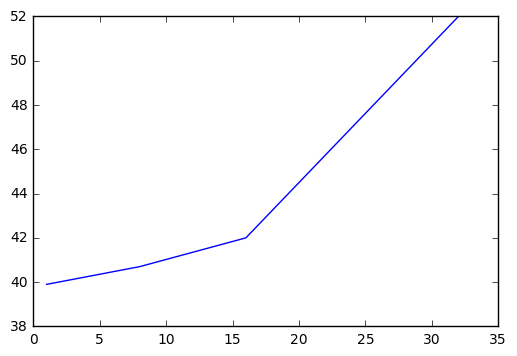

In [535]:
mp.plot(batch_arr, iter_mean_arr + batch_arr)


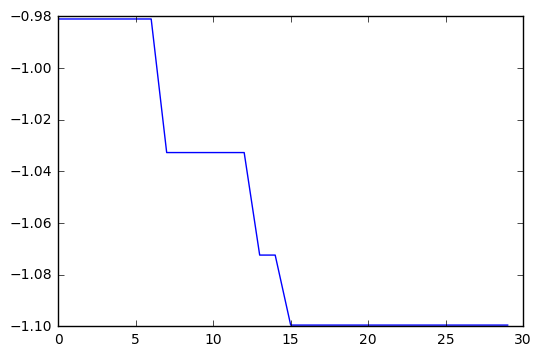

In [325]:
mp.plot(min_t)

In [289]:
par_min_t = min_t

In [100]:
def eximp(ybest, mu, sigma):
    u = (ybest - mu) / sigma
    ucdf = norm.cdf(u)
    updf = norm.pdf(u)
    ei = sigma * (updf + u * ucdf)
    return ei

In [101]:
def aLCB(mu, sigma, kappa):
    return mu - kappa * sigma

 //anaconda/lib/python3.4/site-packages/matplotlib/figure.py:1744: UserWarning:This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.


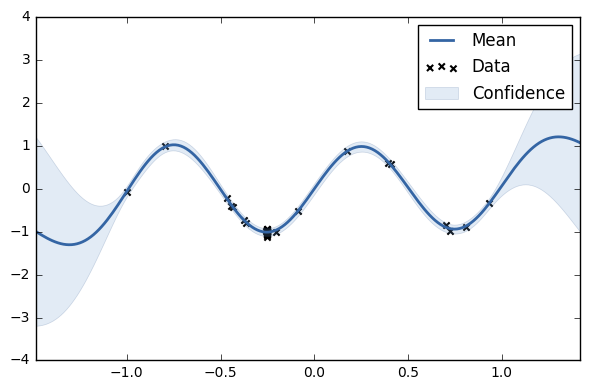

In [194]:
m.plot()

[-0.232323232323232]
[-0.242307424455045]
Optimization restart 1/3, f = 6.8371175659973025
Optimization restart 2/3, f = 6.837117565999206
Optimization restart 3/3, f = 12.097771108491376

 //anaconda/lib/python3.4/site-packages/matplotlib/figure.py:1744: UserWarning:This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.


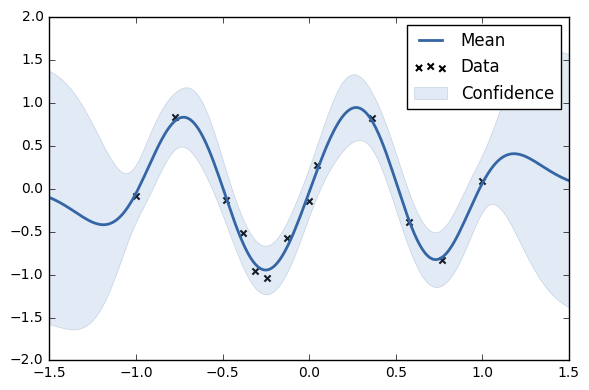

In [531]:
#fun = lambda x: -eximp(ybest, m.predict( np.reshape(x,(1,1)))[0], m.predict(np.reshape(x,(1,1)))[1])
kappa = 5
num_samples = 100
aqfun = lambda x: aLCB( m.predict( np.reshape(x,(len(x),1)))[0], np.sqrt(m.predict(np.reshape(x,(len(x),1)))[1]), kappa)


samples = np.reshape(np.linspace(a,b,num_samples), (num_samples,1))

aq = aqfun(samples)
next_sample = samples[np.argmin(aq)]
print(next_sample)
res = minimize( aqfun, next_sample, bounds = [(a,b)])
next_sample = res.x
print(next_sample)

fx = f(next_sample)

x = np.append(x,next_sample)
y = np.append(y,fx)

x = np.reshape(x, (len(x),1))
y = np.reshape(y, (len(y),1))

m = GPy.models.GPRegression(x,y,kernel)
m.optimize_restarts(3)
fig = m.plot()
mp.savefig('test.png', bbox_inches='tight', dpi=300)

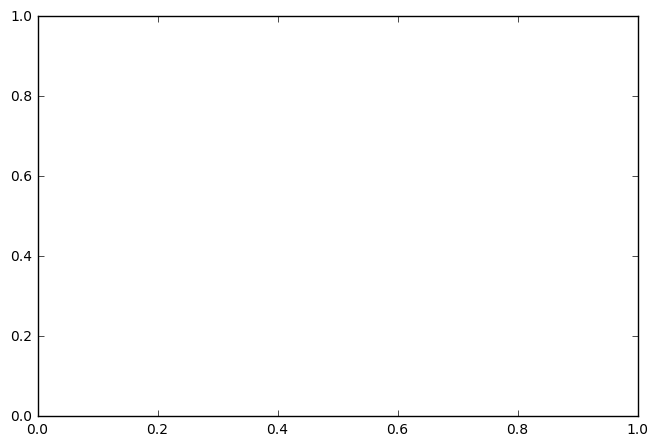

In [528]:
fig = mp.figure()
ax = fig.add_axes([1,1,1,1])


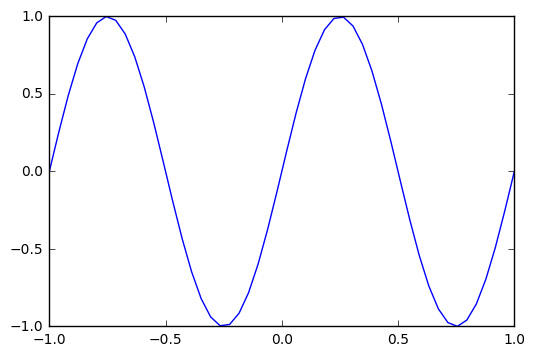

In [293]:
t = np.linspace(a,b)
mp.plot(t,np.sin(2*np.pi*t))

In [253]:
t = np.reshape(t,(2,1))

In [255]:
m.predict(t)[0]

array([[-0.05997335],
       [ 0.00125564]])

In [384]:
num_samples

100

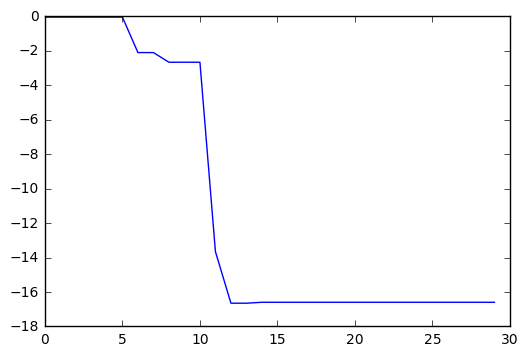

In [226]:
minimum = -1.012531601062896
fig = mp.plot(np.log(abs(min_t-minimum)))

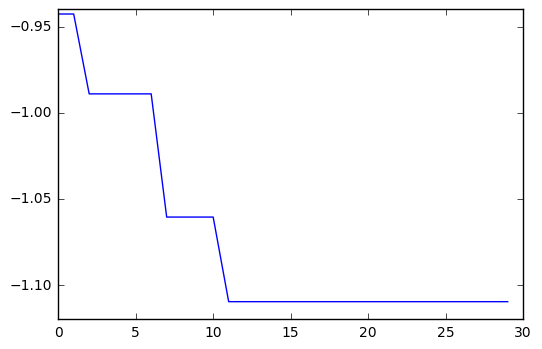

In [227]:
min_t_seq = min_t

In [228]:
np.set_printoptions(precision=15)
min_t

array([-0.05             , -0.05             , -0.05             ,
       -0.05             , -0.05             , -0.05             ,
       -0.889809448665709, -0.889809448665709, -0.942499563999526,
       -0.942499563999526, -0.942499563999526, -1.012530428913585,
       -1.012531659797476, -1.012531659797476, -1.012531663027801,
       -1.012531663027801, -1.012531663028831, -1.012531663028831,
       -1.012531663028831, -1.012531663028831, -1.012531663028831,
       -1.012531663028831, -1.012531663028831, -1.012531663028831,
       -1.012531663028831, -1.012531663028831, -1.012531663028831,
       -1.012531663028831, -1.012531663028831, -1.012531663028831])

 //anaconda/lib/python3.4/site-packages/matplotlib/figure.py:1744: UserWarning:This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.


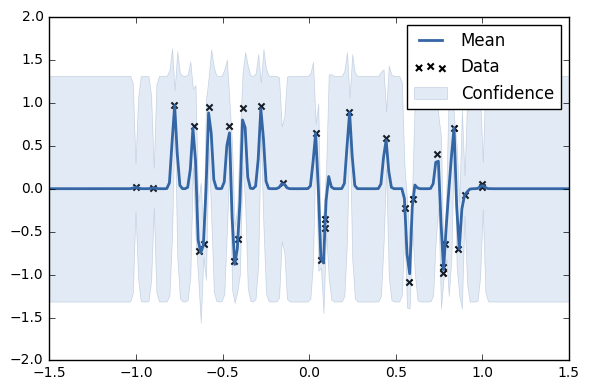

In [260]:
m.plot()